In [50]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
questions = "GF_TutorialHelpful,GF_BasicMechanicTime,GF_SpecialSkillTime,GF_TutorialHelpRemember,GF_LearnedAllSkill,GF_InvolvedInGame,GF_NewBlockSame,GF_HintUseless"
questions = questions.split(',')

full_df = pd.read_csv('all_data.csv')

# Change age to year 20s, 30s,...
full_df['Ages'] = full_df['Age'].apply(lambda x: str(x)[0] + '0s')

print(len(set(full_df['User'])))

89


In [52]:
labels = ['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

# Add summed up column of the labels
full_df['Q_Sum'] = full_df[labels].sum(axis=1)


In [53]:
df = full_df[full_df['L_Step'] == 60]
print(len(set(df['User'])))
len(df)

89


89

In [54]:
# Mean and Average of the Ages
df.describe()

,Unnamed: 0,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece,L_Step,L_DecisionTime,PCGTime,...,EVT_MatchIgnoringHint_CrossPiece,EVT_MatchNoHint_HorizontalPiece,EVT_MatchIgnoringHint_HorizontalPiece,EVT_MatchNoHint_RainbowPiece,EVT_MatchIgnoringHint_RainbowPiece,EVT_MatchNoHint_RocketPiece,EVT_MatchIgnoringHint_RocketPiece,EVT_MatchNoHint_VerticalPiece,EVT_MatchIgnoringHint_VerticalPiece,Q_Sum
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,...,89.0,89.0,89.0,89.0,89.0,89.000000,89.0,89.0,89.0,89.000000
mean,2699.000000,1.404494,0.797753,5.022472,1.921348,5.606742,4.505618,60.0,6.296361,405.224719,...,0.0,0.0,0.0,0.0,0.0,0.011236,0.0,0.0,0.0,1.370787
std,1550.161282,1.303135,1.119860,2.812220,1.632237,5.986003,2.340957,0.0,5.046417,564.090373,...,0.0,0.0,0.0,0.0,0.0,0.106000,0.0,0.0,0.0,1.111735
min,59.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,60.0,0.131714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,1379.000000,0.000000,0.000000,3.000000,1.000000,2.000000,3.000000,60.0,3.331116,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
50%,2699.000000,1.000000,1.000000,5.000000,1.000000,4.000000,4.000000,60.0,4.754395,169.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
75%,4019.000000,2.000000,1.000000,7.000000,3.000000,8.000000,6.000000,60.0,8.731934,644.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.000000
max,5339.000000,6.000000,6.000000,15.000000,7.000000,28.000000,12.000000,60.0,32.093994,2506.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,5.000000


In [55]:
tmp = df.groupby('Ages')['Ages'].agg(['count']).reset_index()
tmp['Percentile'] = tmp['count'] / tmp['count'].sum() * 100
tmp

,Ages,count,Percentile
0,20s,16,17.977528
1,30s,65,73.033708
2,40s,6,6.741573
3,50s,2,2.247191


In [56]:
tmp = df.groupby('GF_PlayFrequency')['GF_PlayFrequency'].agg(['count']).reset_index()
tmp['Percentile'] = tmp['count'] / tmp['count'].sum() * 100
tmp

,GF_PlayFrequency,count,Percentile
0,0,1,1.123596
1,1,44,49.438202
2,2,34,38.202247
3,3,6,6.741573
4,4,4,4.494382


In [57]:
tmp = df.groupby('GF_PlayTime')['GF_PlayTime'].agg(['count']).reset_index()
tmp['Percentile'] = tmp['count'] / tmp['count'].sum() * 100
tmp

,GF_PlayTime,count,Percentile
0,A,6,6.741573
1,B,51,57.303371
2,C,32,35.955056


In [58]:
tmp = df.groupby('Method')['Method'].agg(['count']).reset_index()
tmp['Percentile'] = tmp['count'] / tmp['count'].sum() * 100
tmp

,Method,count,Percentile
0,MCTS_Knowledge,27,30.337079
1,MCTS_Score,29,32.584270
2,Random,33,37.078652


In [59]:
df = full_df[full_df['L_Step'] == 60]

In [60]:
df.describe()

,Unnamed: 0,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece,L_Step,L_DecisionTime,PCGTime,...,EVT_MatchIgnoringHint_CrossPiece,EVT_MatchNoHint_HorizontalPiece,EVT_MatchIgnoringHint_HorizontalPiece,EVT_MatchNoHint_RainbowPiece,EVT_MatchIgnoringHint_RainbowPiece,EVT_MatchNoHint_RocketPiece,EVT_MatchIgnoringHint_RocketPiece,EVT_MatchNoHint_VerticalPiece,EVT_MatchIgnoringHint_VerticalPiece,Q_Sum
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,...,89.0,89.0,89.0,89.0,89.0,89.000000,89.0,89.0,89.0,89.000000
mean,2699.000000,1.404494,0.797753,5.022472,1.921348,5.606742,4.505618,60.0,6.296361,405.224719,...,0.0,0.0,0.0,0.0,0.0,0.011236,0.0,0.0,0.0,1.370787
std,1550.161282,1.303135,1.119860,2.812220,1.632237,5.986003,2.340957,0.0,5.046417,564.090373,...,0.0,0.0,0.0,0.0,0.0,0.106000,0.0,0.0,0.0,1.111735
min,59.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,60.0,0.131714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,1379.000000,0.000000,0.000000,3.000000,1.000000,2.000000,3.000000,60.0,3.331116,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
50%,2699.000000,1.000000,1.000000,5.000000,1.000000,4.000000,4.000000,60.0,4.754395,169.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
75%,4019.000000,2.000000,1.000000,7.000000,3.000000,8.000000,6.000000,60.0,8.731934,644.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.000000
max,5339.000000,6.000000,6.000000,15.000000,7.000000,28.000000,12.000000,60.0,32.093994,2506.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,5.000000


In [61]:
df.groupby('Method')['Method'].agg(['count'])

,count
Method,
MCTS_Knowledge,27
MCTS_Score,29
Random,33


In [62]:
df.groupby('Method')[questions].agg(['mean', 'std'])

GF_TutorialHelpful           GF_BasicMechanicTime            \
                             mean       std                 mean       std   
Method                                                                       
MCTS_Knowledge           5.518519  1.503083             5.407407  1.393923   
MCTS_Score               5.103448  1.588909             5.172414  1.364576   
Random                   5.515152  1.349102             5.212121  1.653738   

               GF_SpecialSkillTime           GF_TutorialHelpRemember  \
                              mean       std                    mean   
Method                                                                 
MCTS_Knowledge            5.777778  1.339728                5.333333   
MCTS_Score                4.965517  1.569412                5.310345   
Random                    5.545455  1.393981                5.272727   

                         GF_LearnedAllSkill           GF_InvolvedInGame  \
                     std               mean       std              mean   
Method                                                                    
MCTS_Knowledge  1.493576           5.518519  1.626000          5.666667   
MCTS_Score      1.198316           5.275862  1.461324          5.137931   
Random          1.566699           5.242424  1.639937          5.606061   

                         GF_NewBlockSame           GF_HintUseless            
                     std            mean       std           mean       std  
Method                                                                       
MCTS_Knowledge  1.208941        5.407407  1.393923       4.407407  2.170772  
MCTS_Score      1.922129        5.275862  1.623412       4.551724  1.681543  
Random          1.498737        4.757576  1.601373       4.818182  2.037991

In [63]:
result = df.groupby('Method')['Q_Sum'].agg(['mean']).reset_index()
result['Result'] = result['mean'] / 6 * 100
result

,Method,mean,Result
0,MCTS_Knowledge,1.666667,27.777778
1,MCTS_Score,1.344828,22.413793
2,Random,1.151515,19.191919


In [64]:
df['Q_Percentile'] = df['Q_Sum'] / 6 * 100

result = df.groupby('Method')['Q_Percentile'].agg(['mean', 'std']).reset_index()
result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Method,mean,std
0,MCTS_Knowledge,27.777778,16.666667
1,MCTS_Score,22.413793,20.057389
2,Random,19.191919,18.219920


<AxesSubplot:xlabel='Method', ylabel='Q_Percentile'>

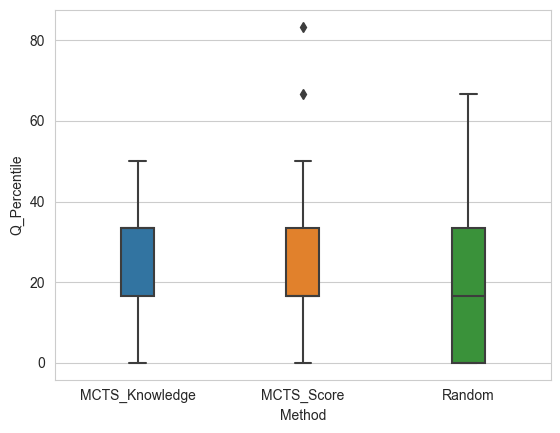

In [65]:
sns.boxplot(x='Method', y='Q_Percentile', data=df, orient='v', width=0.2)


labels = ['Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

for label in labels:
    result = df.groupby('Method')[label].agg(['mean']).reset_index()
    result['Result'] = result['mean'] / 6 * 100
    print(label, '\n', result, end='\n\n')

In [66]:
labels = ['Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']


for label in labels:
    result = df.groupby('Method')[label].agg(['mean']).reset_index()
    result['Result'] = (result['mean'] / 6 * 100) if label == 'Q_Sum' else result['mean'] * 100
    print(label, '\n', result, end='\n\n')
    result.to_html(f'{label}.html')

Q_Sum 
            Method      mean     Result
0  MCTS_Knowledge  1.666667  27.777778
1      MCTS_Score  1.344828  22.413793
2          Random  1.151515  19.191919

Q_BombPiece 
            Method      mean     Result
0  MCTS_Knowledge  0.259259  25.925926
1      MCTS_Score  0.137931  13.793103
2          Random  0.212121  21.212121

Q_CrossPiece 
            Method      mean     Result
0  MCTS_Knowledge  0.370370  37.037037
1      MCTS_Score  0.172414  17.241379
2          Random  0.121212  12.121212

Q_HorizontalPiece 
            Method      mean     Result
0  MCTS_Knowledge  0.111111  11.111111
1      MCTS_Score  0.172414  17.241379
2          Random  0.212121  21.212121

Q_RainbowPiece 
            Method      mean     Result
0  MCTS_Knowledge  0.481481  48.148148
1      MCTS_Score  0.517241  51.724138
2          Random  0.363636  36.363636

Q_RocketPiece 
            Method      mean    Result
0  MCTS_Knowledge  0.037037  3.703704
1      MCTS_Score  0.034483  3.448276
2          

In [67]:
labels = ['Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

tmp_df = df[['GF_PlayTime', 'Method', 'Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']]
tmp_df = tmp_df.melt(id_vars=['GF_PlayTime', 'Method'], value_vars=['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece'])

tmp_df.head()


,GF_PlayTime,Method,variable,value
0,B,MCTS_Knowledge,Q_BombPiece,True
1,B,MCTS_Knowledge,Q_BombPiece,True
2,B,MCTS_Knowledge,Q_BombPiece,False
3,C,MCTS_Knowledge,Q_BombPiece,False
4,B,MCTS_Knowledge,Q_BombPiece,False


(0.0, 1.0)

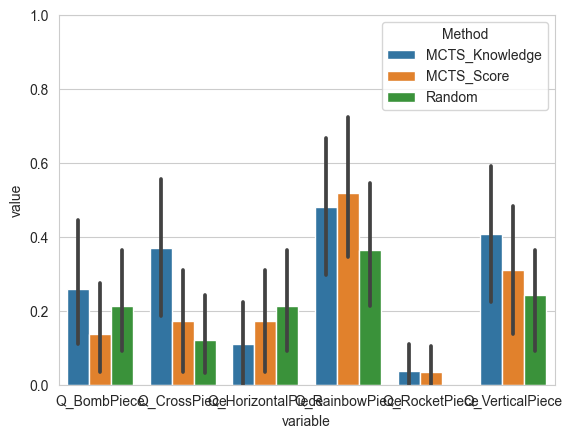

In [68]:
sns.barplot(data=tmp_df, x="variable", y="value", hue="Method")
plt.ylim((0, 1))

In [69]:
labels = ['Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']
df['GF_PlayTime'] = df['GF_PlayTime'].replace(['A'],'B')



tmp_df = df[['GF_PlayTime', 'Method', 'Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']]
tmp_df.groupby(['GF_PlayTime', 'Method'])['GF_PlayTime', 'Method', 'Q_BombPiece',
                'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece'].mean()

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


Q_BombPiece  Q_CrossPiece  Q_HorizontalPiece  \
GF_PlayTime Method                                                         
B           MCTS_Knowledge     0.277778      0.277778           0.111111   
            MCTS_Score         0.157895      0.157895           0.210526   
            Random             0.200000      0.050000           0.250000   
C           MCTS_Knowledge     0.222222      0.555556           0.111111   
            MCTS_Score         0.100000      0.200000           0.100000   
            Random             0.230769      0.230769           0.153846   

                            Q_RainbowPiece  Q_RocketPiece  Q_VerticalPiece  
GF_PlayTime Method                                                          
B           MCTS_Knowledge        0.555556       0.055556         0.388889  
            MCTS_Score            0.631579       0.000000         0.263158  
            Random                0.350000       0.000000         0.200000  
C           MCTS_Knowledge        0.333333       0.000000         0.444444  
            MCTS_Score            0.300000       0.100000         0.400000  
            Random                0.384615       0.000000         0.307692

In [70]:
df

,Unnamed: 0,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece,L_BombPiece,L_CrossPiece,L_HorizontalPiece,...,EVT_MatchIgnoringHint_HorizontalPiece,EVT_MatchNoHint_RainbowPiece,EVT_MatchIgnoringHint_RainbowPiece,EVT_MatchNoHint_RocketPiece,EVT_MatchIgnoringHint_RocketPiece,EVT_MatchNoHint_VerticalPiece,EVT_MatchIgnoringHint_VerticalPiece,Ages,Q_Sum,Q_Percentile
59,59,2,1,5,3,6,5,True,False,True,...,0,0,0,0,0,0,0,30s,3,50.000000
119,119,5,2,2,2,3,2,True,False,True,...,0,0,0,0,0,0,0,30s,2,33.333333
179,179,2,6,8,7,19,8,False,False,False,...,0,0,0,0,0,0,0,30s,0,0.000000
239,239,0,0,6,1,3,2,False,False,True,...,0,0,0,0,0,0,0,30s,0,0.000000
299,299,2,3,5,3,13,3,True,False,True,...,0,0,0,0,0,0,0,30s,1,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,5099,2,4,1,4,19,7,False,False,False,...,0,0,0,0,0,0,0,30s,1,16.666667
5159,5159,2,1,2,1,6,6,False,True,True,...,0,0,0,0,0,0,0,30s,4,66.666667
5219,5219,1,2,1,1,2,4,False,True,True,...,0,0,0,0,0,0,0,30s,0,0.000000
5279,5279,0,0,7,3,14,3,False,False,True,...,0,0,0,0,0,0,0,30s,1,16.666667


In [103]:
labels = ['Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']
skill_names_dict = {
    'Q_BombPiece': 'S4',
    'Q_CrossPiece': 'S3',
    'Q_HorizontalPiece': 'S2',
    'Q_RainbowPiece': 'S6',
    'Q_RocketPiece': 'S5',
    'Q_VerticalPiece': 'S1'
}
generator_types = {
    'Random': 'Random',
    'MCTS_Score': 'MCTS-GEN',
    'MCTS_Knowledge': 'MCTS-PSM'
}

tmp_df = df[['GF_PlayTime', 'Method', 'Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']]
# tmp_df['hue'] = tmp_df.apply(lambda x: x['GF_PlayTime'] + "_" + x['Method'], axis=1)
tmp_df['Method'] = tmp_df['Method'].replace(generator_types)

tmp_df = tmp_df.melt(id_vars=['GF_PlayTime', 'Method'], value_vars=['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece'])


tmp_df['variable'] = tmp_df['variable'].replace(skill_names_dict)
tmp_df = tmp_df.sort_values('variable')
tmp_df


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,GF_PlayTime,Method,variable,value
533,B,Random,S1,False
468,C,MCTS-PSM,S1,True
469,C,MCTS-PSM,S1,True
470,B,MCTS-PSM,S1,True
471,B,MCTS-PSM,S1,False
...,...,...,...,...
328,C,Random,S6,False
329,C,Random,S6,False
330,B,Random,S6,False
332,B,Random,S6,False


In [104]:
plt.rcParams["font.family"] = "Times New Roman"


<Figure size 640x480 with 0 Axes>

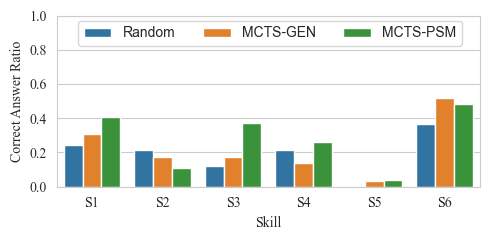

In [105]:
plt.clf()

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 2.5))


# Share the y-axis
ax1.set_ylabel("Value")
ax1.set_ylim(0, 1)
# Share the legend
# Remove the legend from the subplots

# fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))
#

sns.set_style("whitegrid")


legend_order = ['Random', 'MCTS-GEN', 'MCTS-PSM']
sns.barplot(data=tmp_df, x="variable", y="value", hue="Method", errwidth=0.0, ax=ax1, hue_order=legend_order, palette=sns.color_palette('tab10'))
ax1.set_ylabel('Correct Answer Ratio')
ax1.set_xlabel('Skill')


# ax1.legend_ = None
# ax2.legend_ = None
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.55, 0.925), ncol=3)
ax1.legend_ = None
# ax2.legend_ = None

plt.tight_layout()
plt.savefig('correct_answer_rate_all.pdf', dpi=300)

<Figure size 640x480 with 0 Axes>

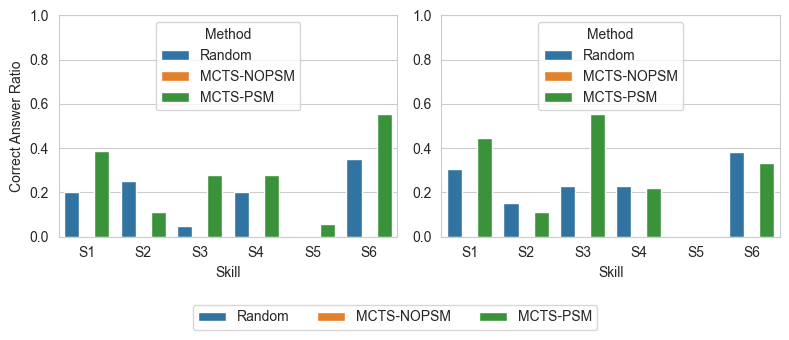

In [74]:


plt.clf()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))


# Share the y-axis
ax1.set_ylabel("Value")
ax2.set_ylabel("Value", visible=False)
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
# Share the legend
# Remove the legend from the subplots

# fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))
#

sns.set_style("whitegrid")


legend_order = ['Random', 'MCTS-NOPSM', 'MCTS-PSM']
sns.barplot(data=tmp_df[tmp_df['GF_PlayTime'] == 'B'], x="variable", y="value", hue="Method", errwidth=0.0, ax=ax1, hue_order=legend_order, palette=sns.color_palette('tab10'))
sns.barplot(data=tmp_df[tmp_df['GF_PlayTime'] == 'C'], x="variable", y="value", hue="Method", errwidth=0.0, ax=ax2, hue_order=legend_order, palette=sns.color_palette('tab10'))

ax1.set_ylabel('Correct Answer Ratio')
ax1.set_xlabel('Skill')
ax2.set_xlabel('Skill')

# ax1.legend_ = None
# ax2.legend_ = None
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)
# ax1.legend_ = None
# ax2.legend_ = None

plt.tight_layout()


In [75]:
df


,Unnamed: 0,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece,L_BombPiece,L_CrossPiece,L_HorizontalPiece,...,EVT_MatchIgnoringHint_HorizontalPiece,EVT_MatchNoHint_RainbowPiece,EVT_MatchIgnoringHint_RainbowPiece,EVT_MatchNoHint_RocketPiece,EVT_MatchIgnoringHint_RocketPiece,EVT_MatchNoHint_VerticalPiece,EVT_MatchIgnoringHint_VerticalPiece,Ages,Q_Sum,Q_Percentile
59,59,2,1,5,3,6,5,True,False,True,...,0,0,0,0,0,0,0,30s,3,50.000000
119,119,5,2,2,2,3,2,True,False,True,...,0,0,0,0,0,0,0,30s,2,33.333333
179,179,2,6,8,7,19,8,False,False,False,...,0,0,0,0,0,0,0,30s,0,0.000000
239,239,0,0,6,1,3,2,False,False,True,...,0,0,0,0,0,0,0,30s,0,0.000000
299,299,2,3,5,3,13,3,True,False,True,...,0,0,0,0,0,0,0,30s,1,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,5099,2,4,1,4,19,7,False,False,False,...,0,0,0,0,0,0,0,30s,1,16.666667
5159,5159,2,1,2,1,6,6,False,True,True,...,0,0,0,0,0,0,0,30s,4,66.666667
5219,5219,1,2,1,1,2,4,False,True,True,...,0,0,0,0,0,0,0,30s,0,0.000000
5279,5279,0,0,7,3,14,3,False,False,True,...,0,0,0,0,0,0,0,30s,1,16.666667


In [76]:
tmp_df2 = df[['GF_PlayTime', 'Method', 'Q_Sum', 'Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']]
tmp_df2['Method'] = tmp_df2['Method'].replace(generator_types)
tmp_df2['hue'] = tmp_df2.apply(lambda x: x['GF_PlayTime'] + "_" + x['Method'], axis=1)

tmp_df2 = tmp_df2.melt(id_vars=['hue'], value_vars=['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece'])

tmp_df2['variable'] = tmp_df2['variable'].replace(skill_names_dict)
tmp_df2 = tmp_df2.sort_values('variable')
tmp_df2

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,hue,variable,value
533,B_Random,S1,False
468,C_MCTS-PSM,S1,True
469,C_MCTS-PSM,S1,True
470,B_MCTS-PSM,S1,True
471,B_MCTS-PSM,S1,False
...,...,...,...
328,C_Random,S6,False
329,C_Random,S6,False
330,B_Random,S6,False
332,B_Random,S6,False


<Figure size 640x480 with 0 Axes>

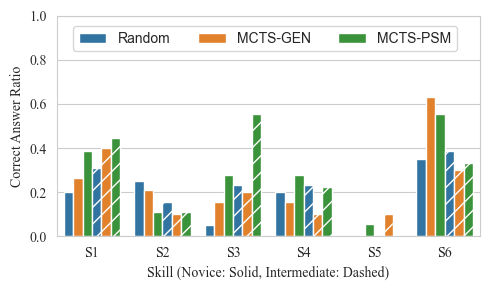

In [106]:
plt.rcParams["font.family"] = "Times New Roman"


plt.clf()

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))


# Share the y-axis
ax1.set_ylabel("Value")
ax1.set_ylim(0, 1)

# Share the legend
# Remove the legend from the subplots

# fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))
#

sns.set_style("whitegrid")

# Get the Set2 palette
palette = sns.color_palette('tab10')

# Repeat the first three colors
repeated_palette = palette[:3] * 3

legend_order = ['B_Random', 'B_MCTS-GEN', 'B_MCTS-PSM', 'C_Random', 'C_MCTS-GEN', 'C_MCTS-PSM']

sns.barplot(data=tmp_df2, x="variable", y="value", hue="hue", errwidth=0.0, ax=ax1, hue_order=legend_order, palette=repeated_palette)
import itertools

hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(ax1.patches):
    if i in range(18, 50):
        bar.set_hatch('//')

ax1.set_ylabel('Correct Answer Ratio')
ax1.set_xlabel('Skill (Novice: Solid, Intermediate: Dashed)')
# ax2.set_xlabel('Skill')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.54, 0.92), ncol=3)

# fig.legend(b2_list, list('WXYZ'), fontsize=16, loc="center right")

ax1.legend_ = None
# ax2.legend_ = None

plt.tight_layout()
plt.savefig('correct_answer_rate_playerlevel.pdf', dpi=300)

In [78]:
tmp_df2.groupby(['variable', 'hue']).mean()

value
variable hue                 
S1       B_MCTS-GEN  0.263158
         B_MCTS-PSM  0.388889
         B_Random    0.200000
         C_MCTS-GEN  0.400000
         C_MCTS-PSM  0.444444
         C_Random    0.307692
S2       B_MCTS-GEN  0.210526
         B_MCTS-PSM  0.111111
         B_Random    0.250000
         C_MCTS-GEN  0.100000
         C_MCTS-PSM  0.111111
         C_Random    0.153846
S3       B_MCTS-GEN  0.157895
         B_MCTS-PSM  0.277778
         B_Random    0.050000
         C_MCTS-GEN  0.200000
         C_MCTS-PSM  0.555556
         C_Random    0.230769
S4       B_MCTS-GEN  0.157895
         B_MCTS-PSM  0.277778
         B_Random    0.200000
         C_MCTS-GEN  0.100000
         C_MCTS-PSM  0.222222
         C_Random    0.230769
S5       B_MCTS-GEN  0.000000
         B_MCTS-PSM  0.055556
         B_Random    0.000000
         C_MCTS-GEN  0.100000
         C_MCTS-PSM  0.000000
         C_Random    0.000000
S6       B_MCTS-GEN  0.631579
         B_MCTS-PSM  0.555556
         B_Random    0.350000
         C_MCTS-GEN  0.300000
         C_MCTS-PSM  0.333333
         C_Random    0.384615

In [79]:
df['Q_Sum_Percentile'] = df['Q_Sum'] / 6 * 100

df.groupby(['Method'])['Q_Sum_Percentile'].agg(['mean', 'std'])
# plt.figure(figsize=(3, 3))

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mean,std
Method,,
MCTS_Knowledge,27.777778,16.666667
MCTS_Score,22.413793,20.057389
Random,19.191919,18.219920


# Draw linegraph with L_Step and L_* as x-axis
PieceTypes = ['BombPiece', 'CrossPiece', 'HorizontalPiece', 'RainbowPiece', 'RocketPiece', 'VerticalPiece']
for piece in PieceTypes:
    sns.lineplot(x='L_Step', y='L_' + piece, hue='Method', data=full_df)
    plt.show()

In [80]:
PieceTypes = ['BombPiece', 'CrossPiece', 'HorizontalPiece', 'RainbowPiece', 'RocketPiece', 'VerticalPiece']

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create data dictionary for my DataFrame (the prediction is L- started piece and the actual is Q- learned piece)
# write for loop to get all the data
def print_confusion_matrix(prediction: list, label: list):
    data = {
        'Label': label,
        'Prediction': prediction
    }

    corr_df = pd.DataFrame(data)
    corr_df['Correct'] = corr_df['Label'] == corr_df['Prediction']

    cm = confusion_matrix(corr_df['Label'], corr_df['Prediction'])
    confusion_matrix_df = pd.crosstab(corr_df['Label'], corr_df['Prediction'], rownames=['Actual'], colnames=['Predicted'])

    accuracy = accuracy_score(corr_df['Label'], corr_df['Prediction'])
    precision = precision_score(corr_df['Label'], corr_df['Prediction'])
    recall = recall_score(corr_df['Label'], corr_df['Prediction'])
    f1 = f1_score(corr_df['Label'], corr_df['Prediction'])

    # Print the confusion matrix and metrics
    print("Confusion Matrix:")
    print(confusion_matrix_df)

    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

    return accuracy, precision, recall, f1

df_data = list()
prediction, label = list(), list()
for piece in PieceTypes:
    print(piece)
    prediction = df[f'L_{piece}'].values
    label = df[f'Q_{piece}'].values

    accuracy, precision, recall, f1 = print_confusion_matrix(prediction, label)
    df_data.append({'Skill': piece, 'Acc.': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

df_student_model = pd.DataFrame(df_data)
df_student_model

BombPiece
Confusion Matrix:
Predicted  False  True
Actual                
False         41    30
True          11     7

Accuracy: 0.54
Precision: 0.19
Recall: 0.39
F1-Score: 0.25

CrossPiece
Confusion Matrix:
Predicted  False  True
Actual                
False         56    14
True          11     8

Accuracy: 0.72
Precision: 0.36
Recall: 0.42
F1-Score: 0.39

HorizontalPiece
Confusion Matrix:
Predicted  False  True
Actual                
False          4    70
True           0    15

Accuracy: 0.21
Precision: 0.18
Recall: 1.00
F1-Score: 0.30

RainbowPiece
Confusion Matrix:
Predicted  False  True
Actual                
False         30    19
True          22    18

Accuracy: 0.54
Precision: 0.49
Recall: 0.45
F1-Score: 0.47

RocketPiece
Confusion Matrix:
Predicted  False  True
Actual                
False         32    55
True           0     2

Accuracy: 0.38
Precision: 0.04
Recall: 1.00
F1-Score: 0.07

VerticalPiece
Confusion Matrix:
Predicted  False  True
Actual                
False

,Skill,Acc.,Precision,Recall,F1-Score
0,BombPiece,0.539326,0.189189,0.388889,0.254545
1,CrossPiece,0.719101,0.363636,0.421053,0.390244
2,HorizontalPiece,0.213483,0.176471,1.000000,0.300000
3,RainbowPiece,0.539326,0.486486,0.450000,0.467532
4,RocketPiece,0.382022,0.035088,1.000000,0.067797
5,VerticalPiece,0.303371,0.287500,0.821429,0.425926


In [82]:
# Function to compute the accuracy, precision, recall, and F1 score

labels = ['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

# Add summed up column of the labels
df['Q_Sum'] = df[labels].sum(axis=1)
df[df['Q_Sum'] == 0]

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece,L_BombPiece,L_CrossPiece,L_HorizontalPiece,...,EVT_MatchNoHint_RainbowPiece,EVT_MatchIgnoringHint_RainbowPiece,EVT_MatchNoHint_RocketPiece,EVT_MatchIgnoringHint_RocketPiece,EVT_MatchNoHint_VerticalPiece,EVT_MatchIgnoringHint_VerticalPiece,Ages,Q_Sum,Q_Percentile,Q_Sum_Percentile
179,179,2,6,8,7,19,8,False,False,False,...,0,0,0,0,0,0,30s,0,0.0,0.0
239,239,0,0,6,1,3,2,False,False,True,...,0,0,0,0,0,0,30s,0,0.0,0.0
359,359,2,0,4,0,4,6,True,False,True,...,0,0,0,0,0,0,30s,0,0.0,0.0
839,839,3,4,6,3,14,9,False,False,True,...,0,0,0,0,0,0,20s,0,0.0,0.0
2099,2099,2,1,11,0,1,5,False,True,True,...,0,0,0,0,0,0,20s,0,0.0,0.0
2159,2159,1,0,7,1,0,9,False,False,True,...,0,0,0,0,0,0,30s,0,0.0,0.0
2219,2219,2,1,7,2,9,7,False,False,True,...,0,0,0,0,0,0,20s,0,0.0,0.0
2519,2519,0,1,3,2,1,4,False,True,True,...,0,0,0,0,0,0,30s,0,0.0,0.0
2579,2579,1,0,4,0,0,4,True,False,True,...,0,0,0,0,0,0,30s,0,0.0,0.0
2939,2939,5,1,8,2,15,4,True,False,True,...,0,0,0,0,0,0,30s,0,0.0,0.0


In [83]:
tmp_df = full_df.copy()
tmp_df['Time'] = pd.to_datetime(tmp_df['Time'])

# Filter the DataFrame to include only rows with 'L_Step' values 60 or -1
filtered_df = tmp_df[tmp_df['L_Step'].isin([60, 1])]

# Create a new DataFrame to store the playtime for each user
playtime_df = pd.DataFrame(columns=['User', 'Method', 'Time'])

# Iterate through each user and calculate their playtime
for user in filtered_df['User'].unique():
    user_data = filtered_df[filtered_df['User'] == user]
    l_step_60_time = user_data[user_data['L_Step'] == 60]['Time'].iloc[0]
    l_step_minus_1_time = user_data[user_data['L_Step'] == 1]['Time'].iloc[0]
    playtime = l_step_60_time - l_step_minus_1_time
    playtime_in_minutes = playtime.total_seconds() / 60.0
    playtime_df = playtime_df.append({'User': user, 'Method': user_data['Method'].iloc[0], 'Time': playtime_in_minutes}, ignore_index=True)

playtime_df

,User,Method,Time
0,14c0e24b,MCTS_Knowledge,8.307133
1,1a1b31b1,MCTS_Knowledge,12.910100
2,211700f2,MCTS_Knowledge,23.649183
3,2602d813,MCTS_Knowledge,11.687050
4,2b767f12,MCTS_Knowledge,16.891083
...,...,...,...
84,e76665a7,Random,9.621100
85,f2585b45,Random,7.923483
86,f6a7f177,Random,17.963417
87,fab90c3f,Random,13.257100


In [84]:
result_df = playtime_df.groupby(['Method'])['Time'].agg(['mean', 'std'])
result_df

,mean,std
Method,,
MCTS_Knowledge,12.834204,5.956119
MCTS_Score,14.826306,10.496828
Random,10.935630,5.595789


In [85]:
playtime_df['Time'].mean() # 평균 플레이 타임

12.779350561797752

In [86]:
playtime_df['Time'].std()

7.718981165380918

In [87]:


quiz_raw_df = pd.read_csv('quiz_raw.csv')
# quiz_raw_df = quiz_raw_df.sort_values(['User', 'QuestionNumber'])

quiz_raw_df['Time'] = pd.to_datetime(quiz_raw_df['Time'])
# Filter the DataFrame to include only rows with 'L_Step' values 60 or -1
filtered_df = quiz_raw_df[quiz_raw_df['QuestionNumber'].isin([0, 11])]

# Create a new DataFrame to store the playtime for each user
playtime_df = pd.DataFrame(columns=['User',  'Playtime'])

# Iterate through each user and calculate their playtime
for user in filtered_df['User'].unique():
    user_data = filtered_df[filtered_df['User'] == user]
    l_step_60_time = user_data[user_data['QuestionNumber'] == 11]['Time'].iloc[0]
    l_step_minus_1_time = user_data[user_data['QuestionNumber'] == 0]['Time'].iloc[0]
    playtime = l_step_60_time - l_step_minus_1_time
    playtime_in_minutes = playtime.total_seconds() / 60.0
    playtime_df = playtime_df.append({'User': user, 'Method': user_data['Method'].iloc[0], 'Playtime': playtime_in_minutes}, ignore_index=True)

result_df = playtime_df.groupby(['Method'])['Playtime'].agg(['mean', 'std'])
result_df

,mean,std
Method,,
MCTS_Knowledge,2.050437,1.597041
MCTS_Score,1.772113,1.468305
Random,1.462945,0.506729


In [88]:
playtime_df['Playtime'].mean() # 평균 플레이 타임

1.74191329588015

In [89]:
playtime_df['Playtime'].std()

1.2615882418011364

In [90]:
estimated_cols = "L_BombPiece,L_CrossPiece,L_HorizontalPiece,L_RainbowPiece,L_RocketPiece,L_VerticalPiece".split(',')


estimated_df = df[estimated_cols + ['Method', 'GF_PlayTime']]
estimated_df['L_Sum'] = estimated_df[estimated_cols].sum(axis=1)
estimated_df['L_Sum_Percentile'] = estimated_df['L_Sum'] / 6 * 100

estimated_df.groupby(['Method'])['L_Sum_Percentile'].agg(['mean', 'std', 'count'])

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean,std,count
Method,,,
MCTS_Knowledge,60.493827,23.637282,27
MCTS_Score,59.770115,19.167827,29
Random,58.585859,20.883777,33


In [91]:
full_df['PCGTime']

0          0
1       2153
2       1170
3        188
4        165
        ... 
5335       0
5336       0
5337       0
5338       0
5339       0
Name: PCGTime, Length: 5340, dtype: int64

In [92]:
# Generating time
pcgtime_df = full_df[full_df['L_Step'] != 1]


pcgtime_df.groupby(['Method'])['PCGTime'].agg(['mean', 'std'])

,mean,std
Method,,
MCTS_Knowledge,740.741996,728.932447
MCTS_Score,907.379895,862.344419
Random,0.000514,0.022663


In [93]:
import numpy as np
z_scores = np.abs((pcgtime_df['PCGTime'] - pcgtime_df['PCGTime'].mean()) / pcgtime_df['PCGTime'].std())

# Define the Z-score threshold for outlier detection
z_score_threshold = 2.0  # You can adjust this threshold as needed, e.g., 2.0 or 3.0

# Filter the DataFrame to remove outliers from "PCGTime"
pcgtime_df_filtered = pcgtime_df[z_scores <= z_score_threshold]
pcgtime_df_filtered.groupby(['Method'])['PCGTime'].agg(['mean', 'std'])


,mean,std
Method,,
MCTS_Knowledge,622.130060,513.502232
MCTS_Score,688.069661,533.759387
Random,0.000514,0.022663


<AxesSubplot:xlabel='Method', ylabel='PCGTime'>

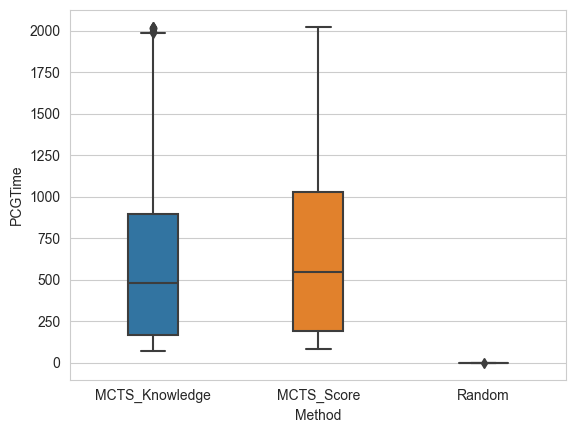

In [94]:
sns.boxplot(data=pcgtime_df_filtered, x="Method", y="PCGTime", width=0.3)

In [95]:
df[df['Method'] == 'MCTS_Score'][['L_BombPiece', 'L_CrossPiece', 'L_HorizontalPiece', 'L_RainbowPiece', 'L_RocketPiece', 'L_VerticalPiece']].mean()

L_BombPiece          0.448276
L_CrossPiece         0.275862
L_HorizontalPiece    1.000000
L_RainbowPiece       0.448276
L_RocketPiece        0.482759
L_VerticalPiece      0.931034
dtype: float64

In [96]:
df[df['Method'] == 'MCTS_Knowledge'][['L_BombPiece', 'L_CrossPiece', 'L_HorizontalPiece', 'L_RainbowPiece', 'L_RocketPiece', 'L_VerticalPiece']].mean()

L_BombPiece          0.518519
L_CrossPiece         0.222222
L_HorizontalPiece    0.925926
L_RainbowPiece       0.444444
L_RocketPiece        0.666667
L_VerticalPiece      0.851852
dtype: float64

<AxesSubplot:xlabel='L_Step', ylabel='L_DecisionTime'>

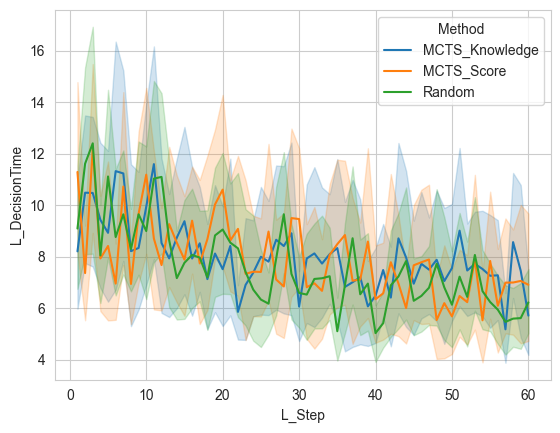

In [97]:
import numpy as np
decision_time_df = full_df.copy()
z_scores = np.abs((decision_time_df['L_DecisionTime'] - decision_time_df['L_DecisionTime'].mean()) / decision_time_df['L_DecisionTime'].std())

# Define the Z-score threshold for outlier detection
z_score_threshold = 2.0  # You can adjust this threshold as needed, e.g., 2.0 or 3.0

# Filter the DataFrame to remove outliers from "PCGTime"
decision_time_df = decision_time_df[z_scores <= z_score_threshold]
sns.lineplot(data=decision_time_df, x="L_Step", y="L_DecisionTime", hue="Method")